In [10]:
# Polynomail regression with Gradient searh

import numpy as np

class PolyRegression:

    # initialize model parameters
    def __init__(self, degree=1, batch_size=32, learning_rate=0.01, epochs=1000):
        self.degree = degree
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    # create polynomial features like x, x^2, x^3 ...
    def _poly_features(self, X):

        X = np.array(X)

        # start with original x
        X_poly = X.copy()

        # add higher powers
        for d in range(2, self.degree + 1):
            X_poly = np.hstack((X_poly, X**d))

        return X_poly

    # train the model
    def fit(self, X_train, y_train):

        # transform input to polynomial form
        X_poly = self._poly_features(X_train)

        # reshape output
        y_train = np.array(y_train).reshape(-1,1)

        # number of samples and features
        m = len(y_train)
        n = X_poly.shape[1]

        # prevent batch size from exceeding dataset size
        self.batch_size = min(self.batch_size, m)


        # initialize weights and bias
        self.coef_ = np.zeros((n,1))
        self.intercept_ = 0

        # how many batches per epoch
        batches = m // self.batch_size

        for epoch in range(self.epochs):

            for _ in range(batches):

                # pick random batch
                idx = np.random.choice(m, self.batch_size, replace=False)

                xi = X_poly[idx]
                yi = y_train[idx]

                # prediction
                y_hat = xi @ self.coef_ + self.intercept_

                # error
                error = y_hat - yi

                # gradients
                dw = (2/self.batch_size) * xi.T @ error
                db = (2/self.batch_size) * np.mean(error)

                # update weights and bias
                self.coef_ -= self.learning_rate * dw
                self.intercept_ -= self.learning_rate * db

            # print loss every 200 epochs
            if epoch % 200 == 0:
                y_pred = X_poly @ self.coef_ + self.intercept_
                loss = np.mean((y_train - y_pred)**2)
                print(f"Epoch {epoch}, Loss {loss:.4f}")

    # make predictions
    def predict(self, X_test):

        # convert test data to polynomial form
        X_poly = self._poly_features(X_test)

        return X_poly @ self.coef_ + self.intercept_

    # mean squared error
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

    # r2 score
    def r2_score(self, y_true, y_pred):

        y_true = np.array(y_true).reshape(-1,1)
        y_pred = np.array(y_pred).reshape(-1,1)

        # residual error
        ss_res = np.sum((y_true - y_pred)**2)

        # total variation
        ss_tot = np.sum((y_true - np.mean(y_true))**2)

        return 1 - ss_res/ss_tot


In [41]:
def train_test_split_manual(X, Y, test_size=0.2, random_state=42):
    rng = np.random.default_rng(random_state)

    X = np.array(X)
    Y = np.array(Y).reshape(-1, 1)

    n_samples = X.shape[0]

    indices = np.arange(n_samples)
    rng.shuffle(indices)

    test_count = int(n_samples * test_size)

    test_idx = indices[:test_count]
    train_idx = indices[test_count:]

    return X[train_idx], X[test_idx], Y[train_idx], Y[test_idx]


In [42]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2


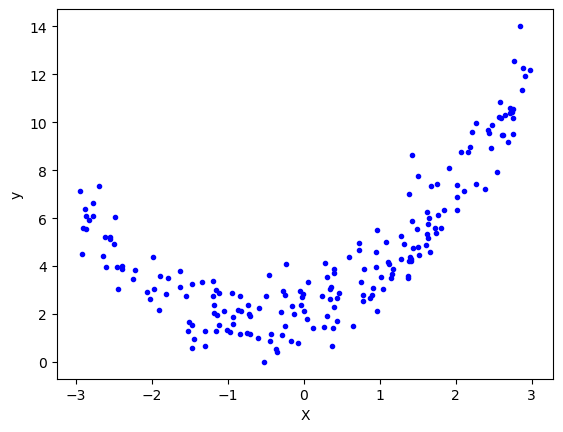

In [43]:
import matplotlib.pyplot as plt

plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2, random_state=2)

"""
    During training, gradient descent initially diverged due to large feature magnitudes.
    This was resolved by applying z-score normalization (mean=0, std=1) to input features, which significantly improved convergence stability.
"""
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std



pr = PolyRegression(degree=3, batch_size=32, learning_rate=0.001, epochs=1000)
pr.fit(X_train, y_train)

print("True:", w_true.ravel(), b_true)
print("Learned:", pr.coef_.ravel(), pr.intercept_)


# My gradient descent converged successfully as indicated by decreasing loss; 
# coefficient values differ from ground truth due to feature standardization.

Epoch 0, Loss 30.0085
Epoch 200, Loss 3.5344
Epoch 400, Loss 3.2982
Epoch 600, Loss 3.1298
Epoch 800, Loss 2.9878
True: [2.78996355] -2.1926867495211173
Learned: [1.91534324 3.4736667  0.37028405] 0.37522725913237476


In [45]:
y_pred = pr.predict(X_test)

print("Predicted:", y_pred.ravel())

Predicted: [12.96026378  1.83869805 10.50366545  0.54224767  1.01382764  1.08186833
  0.10635628  0.76985171  2.08248414  2.12074639  1.67864687  1.64554603
  4.97281288  0.10390289  0.11165299  7.54104489  1.31107359  0.11210377
  6.49210602  6.42929375  0.13303118  1.74703813 11.50061908  4.80781943
  6.77741931  2.38071393  0.37656894  1.75361033  2.86772525  1.00732084
  4.04639288  0.52060838  0.41150182  4.44909349  1.15680953  0.97007409
  5.87576332  0.83679553  0.36969091  3.79716878]


In [53]:
mse = pr.mse(y_test, y_pred)
r2 = pr.r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 2.9853098406965657
R2 Score: 0.6064183729602457


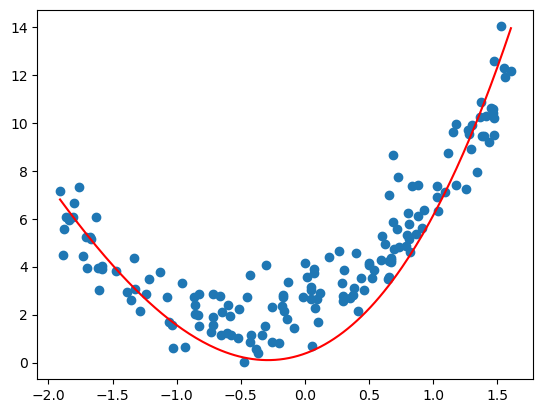

In [56]:
x_line = np.linspace(X_train.min(), X_train.max(), 200).reshape(-1,1)
y_line = pr.predict(x_line)

plt.scatter(X_train[:,0], y_train)
plt.plot(x_line, y_line, color='red')
